<a href="https://colab.research.google.com/github/SpringBoard795/PicasoPhrase_Infosys_Internship_Nov2024/blob/MerajBegum/statsanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [11]:
txt_dir='/content/drive/MyDrive/radiology/captions.txt'

In [13]:
import pandas as pd

In [16]:
txt_data=pd.read_table(txt_dir)

In [20]:
txt_data.head()
with open(txt_dir, 'r') as file:
  for i in range(0):
    print(file.readline().strip())

In [21]:
txt_data

,ROCO_00001,Axial MRI (coronal view).
0,ROCO_00006,Coronal plain computed tomography image showi...
1,ROCO_00016,Axial source image from an intracranial magne...
2,ROCO_00025,"The apical height, homogeneity, and the thick..."
3,ROCO_00031,CTO of RCA (closure in the 2nd segment)
4,ROCO_00036,Venography shows a large amount of thrombogen...
...,...,...
8173,ROCO_81771,Damus–Kaye–Stansel shunt. Oblique coronal MIP...
8174,ROCO_81778,"MRI pelvis post-radiation, axial STIR/T2W FSE..."
8175,ROCO_81792,Fluoroscopic image showing attempts to grab t...
8176,ROCO_81796,Positron emission tomography–computed tomogra...


In [22]:
import numpy as np

In [26]:
random_captions = [
    "This is a beautiful image.",
    "A stunning scene captured perfectly.",
    "The colors in this image are vibrant.",
    "This picture tells a story.",
    "A captivating moment frozen in time."
]
captions = [np.random.choice(random_captions) for i in range(num_samples)]

In [27]:
num_samples=100

In [28]:
image_paths=[f"images/image_{i:03d}.jpg" for i in range(1,num_samples+1)]

In [29]:
captions=[np.random.choice(random_captions) for i in range(num_samples)]

In [30]:
df=pd.DataFrame({
    'image_path':image_paths,
    'caption':captions
})

In [36]:
df.head(10)

,image_path,caption,caption_length
0,images/image_001.jpg,The colors in this image are vibrant.,37
1,images/image_002.jpg,This is a beautiful image.,26
2,images/image_003.jpg,A stunning scene captured perfectly.,36
3,images/image_004.jpg,This is a beautiful image.,26
4,images/image_005.jpg,The colors in this image are vibrant.,37
5,images/image_006.jpg,The colors in this image are vibrant.,37
6,images/image_007.jpg,A stunning scene captured perfectly.,36
7,images/image_008.jpg,This picture tells a story.,27
8,images/image_009.jpg,This picture tells a story.,27
9,images/image_010.jpg,The colors in this image are vibrant.,37


In [37]:
df['caption_length']=df['caption'].astype(str).apply(len)

In [38]:
df

,image_path,caption,caption_length
0,images/image_001.jpg,The colors in this image are vibrant.,37
1,images/image_002.jpg,This is a beautiful image.,26
2,images/image_003.jpg,A stunning scene captured perfectly.,36
3,images/image_004.jpg,This is a beautiful image.,26
4,images/image_005.jpg,The colors in this image are vibrant.,37
...,...,...,...
95,images/image_096.jpg,A captivating moment frozen in time.,36
96,images/image_097.jpg,This is a beautiful image.,26
97,images/image_098.jpg,A captivating moment frozen in time.,36
98,images/image_099.jpg,The colors in this image are vibrant.,37


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   image_path      100 non-null    object
 1   caption         100 non-null    object
 2   caption_length  100 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [40]:
df['caption_length'].describe()

,caption_length
count,100.00000
mean,32.75000
std,4.75538
min,26.00000
25%,27.00000
50%,36.00000
75%,36.00000
max,37.00000


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='caption_length', ylabel='Count'>

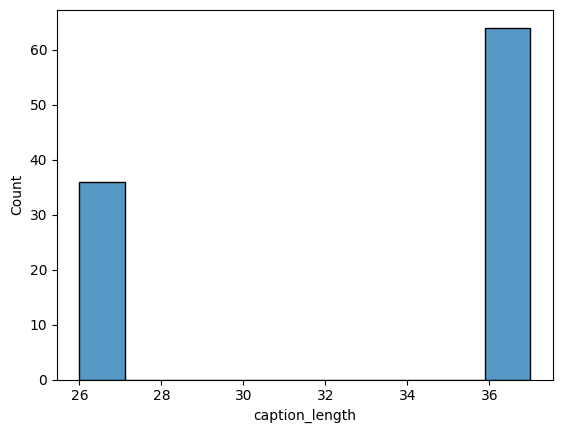

In [42]:
sns.histplot(df['caption_length'],bins=10)

<Axes: ylabel='caption_length'>

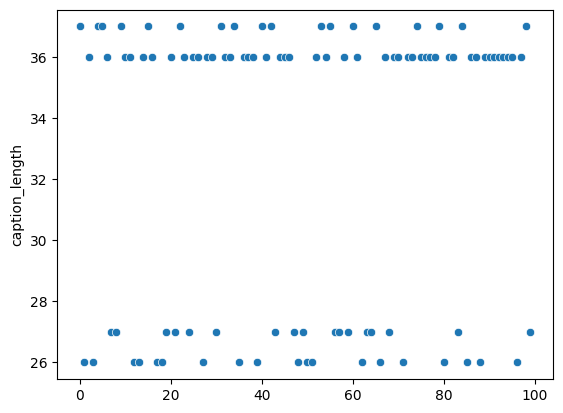

In [43]:
sns.scatterplot(df['caption_length'])

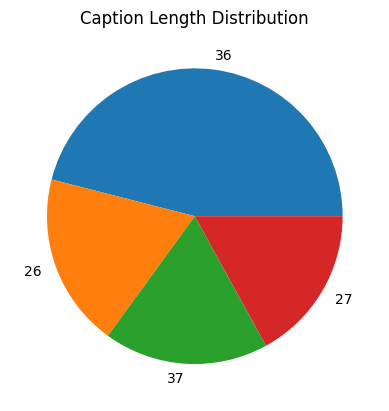

In [45]:
plt.pie(df['caption_length'].value_counts(), labels=df['caption_length'].value_counts().index)
plt.title('Caption Length Distribution')
plt.show()

In [46]:
from wordcloud import WordCloud

In [47]:
caption_text=''.join(df['caption'].astype(str))

In [48]:
wordcloud=WordCloud(width=800,height=400,max_words=50).generate(caption_text)

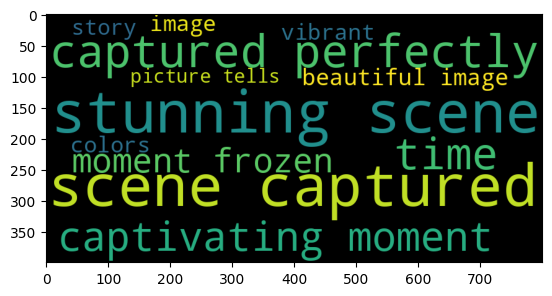

In [49]:
plt.imshow(wordcloud)